<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Maratona_BehindTheCode_IBM20/blob/main/Desafio%204/DF4_ALGAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DF4-TNT

## IMPORTAÇÕES

In [ ]:
!pip install tpot
from tpot import TPOTClassifier

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 7.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=a46ce8f12ddc98ba507d66d46b8c1212c8f67a2e84b622c28eb036c48ed99f95
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
!pip install sweetviz
import sweetviz

     |████████████████████████████████| 327kB 2.6MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/maratonadev-br/desafio-4-2020/master/data/train_dataset_algartech.csv")
df.head(3)

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não


In [ ]:
toScore = pd.read_csv("/content/toScore.csv")
toScore.head(3)

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
0,40,Misto,444,Vendas,2,Superior incompleto,Marketing,1,1986,2,F,92,3,2,Vendedo senior,2,Casado,5677,4258,3,1,Não,14,3,3,80,1,15,4,3,11,8,5,10
1,25,Misto,309,RH,2,Superior completo,Ciências humanas,1,1987,3,F,82,3,1,Assistente,2,Casado,2187,19655,4,1,Não,14,3,3,80,0,6,3,3,2,0,1,2
2,30,Misto,911,Engenharia,1,Superior incompleto,Medicina,1,1989,4,M,76,3,1,Tecnico,2,Casado,3748,4077,1,1,Não,13,3,3,80,0,12,6,2,12,8,1,7


## Analises

In [ ]:
my_report = sweetviz.analyze(df)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:12  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
colsToDrop = ["Possui carro", "Maior de idade", "Horas de trabalho padrão"]
for col in colsToDrop:
  try:
    df.drop(col, axis=1, inplace=True)
    toScore.drop(col, axis=1, inplace=True)
  except: print(f"{col:<25} Already Droped")

In [ ]:
df.loc[(df.Contratar == "Sim") & (df.Genero == "M")].shape[0]

119

In [ ]:
toScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       100 non-null    int64 
 1   Local de trabalho                           99 non-null     object
 2   Pontuação teste                             100 non-null    int64 
 3   Departmento                                 100 non-null    object
 4   Distancia casa-trabalho                     100 non-null    int64 
 5   Educacao                                    100 non-null    object
 6   Area                                        100 non-null    object
 7   Subordinado                                 100 non-null    int64 
 8   Satisfação com o ambiente no emprego atual  100 non-null    int64 
 9   Genero                                      100 non-null    object
 10  Horas voluntariado         

In [ ]:
df2 = df.copy()
toScore2 = toScore.copy()

cat_cols = df2.select_dtypes(include=object).columns

toScore2["Local de trabalho"].fillna(toScore2["Local de trabalho"].mode()[0], inplace=True)

df2[cat_cols] = df2[cat_cols].apply(lambda col: LabelEncoder().fit_transform(col))
toScore2[cat_cols[:-1]] = toScore2[cat_cols[:-1]].apply(lambda col: LabelEncoder().fit_transform(col))

df2.head(3)

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,0,279,0,8,0,0,2,3,1,61,2,2,3,2,0,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
1,33,2,1392,0,3,4,0,5,4,0,56,3,1,3,3,0,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
2,27,0,591,0,2,0,4,7,1,1,40,3,1,6,2,0,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


## Treinamento

In [ ]:
X = df2.drop("Contratar", axis=1)
#X = X[maskcols]
y = df2["Contratar"]

In [ ]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X, y)
print(X_under.shape, y_under.shape)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print(X_smote.shape, y_smote.shape)

(384, 31) (384,)
(2356, 31) (2356,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.0729, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1270, 31), (100, 31), (1270,), (100,))

In [ ]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.26, random_state=42)
X_train_u.shape, X_test_u.shape, y_train_u.shape, y_test_u.shape

((284, 31), (100, 31), (284,), (100,))

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.26, random_state=42)
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape

((1743, 31), (613, 31), (1743,), (613,))

In [ ]:
#smote = SMOTE()
#X_smt, y_smt = smote.fit_resample(Xtrain, ytrain)
#print("SMOTE : ", X_smt.shape, y_smt.shape)

#rus = RandomUnderSampler()
#X_rus, y_rus = rus.fit_resample(Xtrain, ytrain)
#print("RandomUnderSampler : ", X_rus.shape, y_rus.shape)

SMOTE :  (2174, 31) (2174,)
RandomUnderSampler :  (366, 31) (366,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ytest.sum()

9

In [ ]:
DTC_fs = tree.DecisionTreeClassifier(random_state=0)
DTC_fs.fit(X_rus, y_rus)
DTC_fs_p = DTC_fs.predict(Xtest)
print(f1_score(ytest, DTC_fs_p, average="micro"))

0.61


In [ ]:
for n in range(0, len(DTC_fs.feature_importances_)):
  print(f"{X.columns[n]:-<45}{DTC_fs.feature_importances_[n]*100}%")

Idade----------------------------------------4.277154475367192%
Local de trabalho----------------------------4.265417642466822%
Pontuação teste------------------------------5.985004282201531%
Departmento----------------------------------0.0%
Distancia casa-trabalho----------------------2.7807984023745558%
Educacao-------------------------------------0.0%
Area-----------------------------------------0.957585219880302%
Subordinado----------------------------------15.576514996807317%
Satisfação com o ambiente no emprego atual---0.9484777517564399%
Genero---------------------------------------0.0%
Horas voluntariado---------------------------2.4291508659999375%
Envolvimento com trabalho--------------------0.0%
Posicao--------------------------------------0.0%
Cargo----------------------------------------6.690823302957735%
Satisfação com emprego-----------------------0.0%
Estado civil---------------------------------0.0%
Renda----------------------------------------15.1346007611491%
Bonus d

In [ ]:
DTC_u = tree.DecisionTreeClassifier(random_state=0)
DTC_u.fit(X_train_u, y_train_u)
DTC_u_p = DTC_u.predict(X_test_u)
print(f1_score(y_test_u, DTC_u_p, average="micro"))

0.63


In [ ]:
DTC_s = tree.DecisionTreeClassifier(random_state=0)
DTC_s.fit(X_train_smote, y_train_smote)
DTC_s_p = DTC_s.predict(X_test_smote)
print(f1_score(y_test_smote, DTC_s_p, average="micro"))

0.8172920065252853


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
k_vs_score = []

for k in range(2,32,1):
  selector = SelectKBest(score_func=f_classif, k=k)

  Xtrain2 = selector.fit_transform(X_train_u, y_train_u)
  Xval2 = selector.transform(X_test_u)

  mdl2 = DecisionTreeClassifier(random_state=0)
  mdl2.fit(Xtrain2, y_train_u)

  p2 = mdl2.predict(Xval2)

  score = f1_score(y_test_u, p2, average="micro")
  print("k = {} - f1 = {}".format(k, score))

  k_vs_score.append(score)

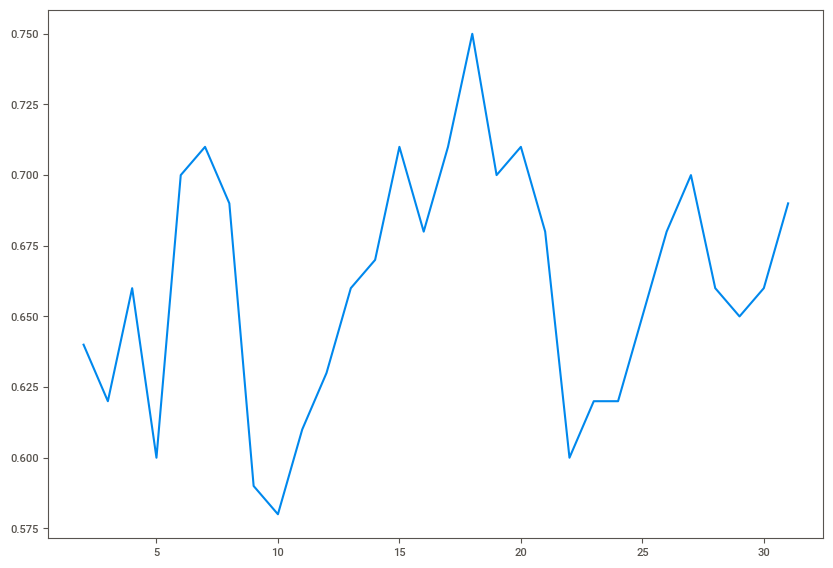

In [ ]:
pd.Series(k_vs_score, index=range(2,32,1)).plot(figsize=(10,7));

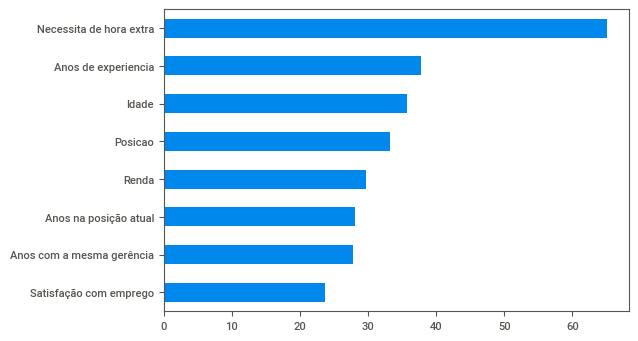

In [ ]:
selector = SelectKBest(score_func=f_classif, k=18)
selector.fit(Xtrain, ytrain)

mask = selector.get_support()
Xtest.columns[mask]

pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail(8).plot.barh();

In [ ]:
maskcols = list(Xtest.columns[mask])
maskcols

['Idade',
 'Local de trabalho',
 'Departmento',
 'Subordinado',
 'Satisfação com o ambiente no emprego atual',
 'Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Necessita de hora extra',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos com a mesma gerência']

In [ ]:
tp = TPOTClassifier(random_state=42, generations=30, 
                    verbosity=2, scoring="f1_micro", early_stop=10)
tp.fit(X_train_smote, y_train_smote)
tp.export('tpot_exported_pipeline_smote.py')


Generation 1 - Current best internal CV score: 0.9225422389091987
Generation 2 - Current best internal CV score: 0.9276981852913085
Generation 3 - Current best internal CV score: 0.9276981852913085
Generation 4 - Current best internal CV score: 0.9276981852913085
Generation 5 - Current best internal CV score: 0.9305701017686001
Generation 6 - Current best internal CV score: 0.9305701017686001
Generation 7 - Current best internal CV score: 0.9305701017686001
Generation 8 - Current best internal CV score: 0.9305701017686001
Generation 9 - Current best internal CV score: 0.9305701017686001
Generation 10 - Current best internal CV score: 0.9305701017686001
Generation 11 - Current best internal CV score: 0.9305701017686001
Generation 12 - Current best internal CV score: 0.9305701017686001
Generation 13 - Current best internal CV score: 0.9305717485096994
Generation 14 - Current best internal CV score: 0.931722820538155
Generation 15 - Current best internal CV score: 0.931722820538155
Gener

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.942619306392649
pipe_smote = make_pipeline(
    Normalizer(norm="l1"),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.25, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
)
set_param_recursive(pipe_smote.steps, 'random_state', 42)

pipe_smote.fit(X_train_smote, y_train_smote)
predict = pipe_smote.predict(X_test_smote)
print(f1_score(y_test_smote, predict, average="micro"))

predict2 = pipe_smote.predict(X_test_u)
print(f1_score(y_test_u, predict2, average="micro"))

predict3 = pipe_smote.predict(Xtest)
print(f1_score(ytest, predict3, average="micro"))

0.9526916802610114
0.99
0.9500000000000001


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# 0.7710526315789473 | 0.71 | (284, 31), (100, 31)
pipe_under = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_leaf=8, min_samples_split=10)),
    MaxAbsScaler(),
    LogisticRegression(C=5.0, dual=False, penalty="l2")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

pipe_under.fit(X_train_u, y_train_u)
results = pipe_under.predict(X_test_u)
print(f1_score(y_test_u, results, average="micro"))

0.7100000000000001


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from tpot.export_utils import set_param_recursive

# 0.9342210922188675 | 0.7 | (2174, 31)
pipe1_rus = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    Normalizer(norm="l1"),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=0.7000000000000001)
)
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

pipe1_rus.fit(X_rus, y_rus)
results = pipe1_rus.predict(Xtest)
print(f1_score(ytest, results, average="micro"))

0.7


In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# 0.7128470936690114 | 0.76 (366, 2)
pipe2_rus = make_pipeline(
    StackingEstimator(estimator=BernoulliNB(alpha=0.1, fit_prior=False)),
    MultinomialNB(alpha=0.01, fit_prior=True)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(pipe2_rus.steps, 'random_state', 42)

pipe2_rus.fit(X_rus, y_rus)
results = pipe2_rus.predict(Xtest)
print(f1_score(ytest, results, average="micro"))

0.76


In [ ]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# Average CV score on the training set was: 0.7621251388374676
pipe3_rus = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    MaxAbsScaler(),
    MinMaxScaler(),
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_leaf=7, min_samples_split=11)),
    BernoulliNB(alpha=0.001, fit_prior=True)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(pipe3_rus.steps, 'random_state', 42)

pipe3_rus.fit(X_rus, y_rus)
results = pipe3_rus.predict(Xtest)
print(f1_score(ytest, results, average="micro"))

0.83


In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 2.3MB/s 


In [ ]:
from skopt import gp_minimize

def tunar_modelo(params):
  learning_rate = params[0]
  n_estimators = params[1]
  min_samples_split = params[2]
  min_samples_leaf = params[3]

  print(params,'\n')
  mdl = GradientBoostingClassifier(
      learning_rate = learning_rate, n_estimators = n_estimators,
      min_samples_split = min_samples_split.astype(int), 
      min_samples_leaf = min_samples_leaf.astype(int), 
      random_state = 0)
  
  mdl.fit(Xtrain, ytrain)
  p = mdl.predict(Xtest)
  return -f1_score(ytest, p, average="micro")

space = [(1e-2, 1e-1), # learning_rate
         (1, 1000), # n_estimators
         (2, 100), # min_samples_split
         (1, 100)] # min_samples_leaf, # subsample, # max_features

resultado_gp = gp_minimize(tunar_modelo, space, random_state=0, 
                           n_calls=100, n_random_starts=20, verbose=1)

In [ ]:
resultado_gp.x # 92,34% [0.062100338765976607, 769, 100, 100]
# 92% [0.1, 1000, 2, 1] 

[0.06335601564025166, 844, 86, 85]

In [ ]:
GBC = GradientBoostingClassifier(learning_rate = 0.062100338765976607, n_estimators = 769,
                                  min_samples_split = 100, min_samples_leaf = 100, random_state = 0)
GBC.fit(Xtrain, ytrain)
p = GBC.predict(Xtest)
print(f1_score(ytest, p, average="micro"))

0.96


In [ ]:
GBC2 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 1000,
                                  min_samples_split = 2, min_samples_leaf = 1,
                                  random_state = 0)
GBC2.fit(Xtrain, ytrain)
p = GBC2.predict(Xtest)
print(f1_score(ytest, p, average="micro"))

0.92


In [ ]:
toScore2_droped = toScore2.drop(["Departmento", "Genero", "Estado civil", 
              "Anos na posição atual", "Anos desde última promoção"],axis=1)
toScore2_droped.columns

In [ ]:
Xtrain.columns

In [ ]:
GBC_p = GBC.predict(toScore2)
GBC_p.sum()

5

In [ ]:
Submission3 = pd.DataFrame(GBC_p, columns=["$R-Contratar"])

Submission3.loc[Submission3["$R-Contratar"] == 1, "$R-Contratar"] = "Sim"
Submission3.loc[Submission3["$R-Contratar"] == 0, "$R-Contratar"] = "Não"

results2 = pd.read_csv("/content/results2.csv")
count = 0
for n in range(0, 100):
  if Submission3["$R-Contratar"][n] != results2["$R-Contratar"][n]:
    count += 1
count

4

In [ ]:
Submission3["$R-Contratar"].value_counts()

Não    95
Sim     5
Name: $R-Contratar, dtype: int64

In [ ]:
DTC_fs_pred = DTC_fs.predict(toScore2)
DTC_fs_pred.sum()

25

In [ ]:
pipe2_rus_pred = pipe2_rus.predict(toScore2[maskcols])
pipe2_rus_pred.sum()

42

In [ ]:
pipe3_rus_pred = pipe3_rus.predict(toScore2)
pipe3_rus_pred.sum()

17

In [ ]:
GBC2_pred = GBC2.predict(toScore2[maskcols])
GBC2_pred.sum()

3

In [ ]:
pipe_under_pred = pipe_under.predict(toScore2)
pipe_under_pred.sum()

27

In [ ]:
toScore2.loc[(toScore2["Anos de experiencia"] == 0) & 
             (toScore2["Necessita de hora extra"] == 1)]

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
77,19,2,528,2,22,0,3,167,4,1,50,3,1,8,3,2,1675,26820,1,1,19,3,4,0,0,2,2,0,0,0,0


In [ ]:
count = 0
for row in range(0,100):
  if pipe3_rus_pred[row] != DTC_fs_pred[row]:
    count += 1
print(count) 

12


In [ ]:
count = 0
for row in range(0,100):
  if pipe_under_pred[row] != DTC_fs_pred[row]:
    count += 1
print(count) 

18


In [ ]:
pd.DataFrame(GBC_p, columns=["$R-Contratar"]).to_csv("results", index=False) # ***

In [ ]:
pd.concat([toScore, pd.Series(pipe2_rus_pred)], axis=1)

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,0
0,40,Misto,444,Vendas,2,Superior incompleto,Marketing,1986,2,F,92,3,2,Vendedo senior,2,Casado,5677,4258,3,Não,14,3,3,1,15,4,3,11,8,5,10,0
1,25,Misto,309,RH,2,Superior completo,Ciências humanas,1987,3,F,82,3,1,Assistente,2,Casado,2187,19655,4,Não,14,3,3,0,6,3,3,2,0,1,2,0
2,30,Misto,911,Engenharia,1,Superior incompleto,Medicina,1989,4,M,76,3,1,Tecnico,2,Casado,3748,4077,1,Não,13,3,3,0,12,6,2,12,8,1,7,0
3,25,Misto,977,Engenharia,2,Médio completo,Outros,1992,4,M,57,3,1,Tecnico,3,Divorciado,3977,7298,6,Sim,19,3,3,1,7,2,2,2,2,0,2,1
4,47,Escritório,1180,Engenharia,25,Superior completo,Medicina,1993,1,M,84,3,3,Analista,3,Solteiro,8633,13084,2,Não,23,4,2,0,25,3,3,17,14,12,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,Cliente,504,Engenharia,10,Superior completo,Medicina,342,1,M,61,3,3,Supervisor,3,Divorciado,10048,22573,6,Não,11,3,2,2,17,5,3,1,0,0,0,0
96,31,Misto,307,Engenharia,29,Superior incompleto,Medicina,355,3,M,71,2,1,Tecnico,2,Solteiro,3479,11652,0,Não,11,3,2,0,6,2,4,5,4,1,4,0
97,28,Escritório,529,Engenharia,2,Superior incompleto - cursando,Ciências das natureza,364,1,M,79,3,1,Tecnico,3,Solteiro,3485,14935,2,Não,11,3,3,0,5,5,1,0,0,0,0,0
98,47,Cliente,666,Engenharia,29,Superior incompleto - cursando,Ciências das natureza,376,1,M,88,3,3,Gerente,2,Casado,11849,10268,1,Sim,12,3,4,1,10,2,2,10,7,9,9,1


In [ ]:
df.loc[(df["Contratar"] == "Sim")]["Necessita de hora extra"].value_counts()

Sim    101
Não     91
Name: Necessita de hora extra, dtype: int64

In [ ]:
df["Necessita de hora extra"].value_counts()

Não    992
Sim    378
Name: Necessita de hora extra, dtype: int64

In [ ]:
Submission2 = pd.DataFrame(DTC_fs_pred, columns=["$R-Contratar"])

Submission2.loc[Submission2["$R-Contratar"] == 1, "$R-Contratar"] = "Sim"
Submission2.loc[Submission2["$R-Contratar"] == 0, "$R-Contratar"] = "Não"

In [ ]:
Submission2.to_csv("results", index=False) # **

In [ ]:
count = 0
for n in range(0, 100):
  if Submission3["$R-Contratar"][n] != Submission2["$R-Contratar"][n]:
    count += 1
count

22

In [ ]:
GBC_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pipe_smote_pred = pipe_smote.predict(toScore2)
pipe_smote_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Submission4 = pd.DataFrame(pipe_smote_pred, columns=["$R-Contratar"])

Submission4.loc[Submission4["$R-Contratar"] == 1, "$R-Contratar"] = "Sim"
Submission4.loc[Submission4["$R-Contratar"] == 0, "$R-Contratar"] = "Não"

Submission4.to_csv("results", index=False)